# Bias-variance and regularization
This exercise is about applying regularization to mitigate the effects of overfitting. This exercise assumes that you have read the tutorial about cross validation
.

<article class="message">
    <div class="message-body">
        <strong>List of tasks</strong>
        <ul style="list-style: none;">
            <li>
            <a href="#reflect">Task 1: Tutorial review</a>
            </li>
            <li>
            <a href="#ridge0">Task 2: Reflections on regularization</a>
            </li>
            <li>
            <a href="#ridge1111">Task 3: Loading the dataset</a>
            </li>
            <li>
            <a href="#ride">Task 4: Implementing regularization</a>
            </li>
            <li>
            <a href="#eval">Task 5: Evaluating models</a>
            </li>
            <li>
            <a href="#cv">Task 6: Cross validation</a>
            </li>
            <li>
            <a href="#reflection">Task 7: Reflection on results</a>
            </li>
        </ul>
    </div>
</article>

## Reflection on the tutorial

---
**Task 1 (easy): Tutorial review👩‍💻💡**
1. Make a copy of the tutorial and make edits in the copy. 

2. In the tutorial, go to the "Hold-out validation" section and add a for loop that runs the cell for at least 10 iterations. That is, in each iteration:
    - Run the hold-out train-validation split. 
    - Fit the model on the training set. 
    - Compute and store the $R^2$ scores on the validation set.


3. Inspect the minimum and maximum $R^2$ scores and calculate their mean and variance. What does this indicate about the influence of the training set on model predictions?

4. Go to the "Effects of polynomials on model fit" section and implement 10 fold cross validation to train the models with 3rd, 4th, and 5th order polynomials. Does this affect the fit of the models? 



---

In [1]:
# Add your reflections here

## Regularization
In the cross validation tutorial
, it was observed that adding third or higher order polynomial terms results in overfitting of the regression model. In the following steps, a model pipeline similar to the one from the tutorial will be built, this time using ridge regression.

---
**Task 2 (easy): Reflections on regularization💡**
1. Define the loss function used in ridge regression.
2. What is the importance of the regularization parameter $\lambda$?
3. What influence does $\lambda$ have when it becomes:    - 0?
    - 1?
    - Large?




---

## Task 2 reflection


#### **1. Loss function used in Ridge Regression**
For a given loss function $L(\theta)$, regularization modifies it as:

$$
L_{\text{regularized}} = L(\theta) + \lambda R(\theta)
$$

Where:

- $L(θ)$: Original loss function (e.g., Mean Squared Error in least squares).
- $R(θ)$: Adds the sum of the squared model's weights to the loss function:

$$
R(\theta) = \sum_{i=1}^n \theta_i^2
$$
- $λ$: Regularization parameter that controls the trade-off between the original loss and the penalty term.

#### **2. Importance of \( λ \)**
- Balances **fit** (training error) vs **simplicity** (smaller coefficients).
- Optimizing \( λ \) reduces overfitting and improves generalization.

#### **3. Influence of \( λ \)**
- **\( λ = 0 \):** No penalty, behaves like linear regression 
    - May overfit because it wants to minimize the loss.
- **\( λ = 1 \):** Moderate penalty, reduces overfitting slightly.
- **\( λ \) large:** Strong penalty, shrinks coefficients.
    - Risk of underfitting, since it is more important for the model to have low model parameters than it is to minimize the loss



---
**Task 3 (easy): Loading the dataset👩‍💻**
1. Run the cell below to import libraries and set up the dataset.


---

In [2]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import KFold, RepeatedKFold, cross_validate
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures, Normalizer
from sklearn.pipeline import Pipeline
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge # additional import for regularization

np.random.seed(99) # seed for randomization

dataset = fetch_california_housing(as_frame=True)

df = dataset.frame # This is the dataframe (a table)

X = dataset.data # These are the input features (anything but the house price)
y = dataset.target # This contains the output features (just the house price)


---
**Task 4 (medium): Implementing regularization👩‍💻**
1. Run the cell below to:    - create a third-order polynomial model with ridge regression using the `Ridge`
 class from Scikit learn.
    - use the `np.geomspace`
 function to create an array, `regularization_params`
, with values exponentially spaced between $10^{-10}$ and $10^2$. These values will be used to vary the regularization parameter. 


2. In the cell below, divide the dataset into an 80-20 training-validation split and use the training set to train third-order Ridge regression models with different regularization parameters $\lambda_i$, by iterating over the elements in `regularization_params`
. 

**Note:** Note: the regularization parameter $\lambda$  is called alpha in sckit learn.

3. Asses the performance of the models on the validation set by calculating the $R^2$ scores and store them in `scores`
.

4. Run the cell below to plot the $R^2$ scores for each model (each regularization value). What does the plot reveal about the effect of the regularization parameter on the perfomance of the model on the testing set. 



---

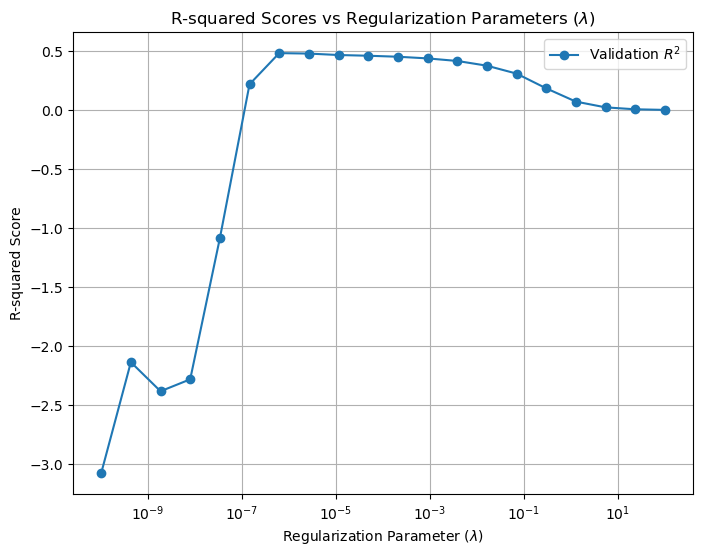

In [3]:
# Regularization parameters
regularization_params = np.geomspace(1e-10, 1e2, 20)

# Split dataset into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize an empty list to store R-squared scores
scores = []

# Train Ridge regression models with different regularization parameters
for alpha in regularization_params:
    model = Pipeline([
        ("features", PolynomialFeatures(3)),  # 3rd-order polynomial features
        ("normalization", Normalizer()),      # Normalize features
        ("model", Ridge(alpha=alpha))         # Ridge regression with current alpha
    ])
    model.fit(X_train, y_train)
    r2_score = model.score(X_val, y_val)     # Evaluate on validation set
    scores.append(r2_score)

# Plot the results
plt.figure(figsize=(8, 6))
plt.plot(regularization_params, scores, marker='o', linestyle='-', label="Validation $R^2$")
plt.xscale('log')
plt.title('R-squared Scores vs Regularization Parameters ($\\lambda$)')
plt.xlabel('Regularization Parameter ($\\lambda$)')
plt.ylabel('R-squared Score')
plt.grid(True)
plt.legend()
plt.show()


---
**Task 5 (easy): Evaluating models👩‍💻**
This task is about evaluating the effects of the regularisation parameters.
1. In the cell above, add a for-loop to rerun the cell 20 times and store the $R^2$ results from each iteration. The loop should repeat the 80-20 hold-out train-validation split each time as in [Task 1](#reflect). 
2. Calculate the mean and variance of the $R^2$ scores for each regularization value then run the cell below to plot the results. 
3. Based on the plots, which regularization parameter value gives the best results and why? Note down your observations and reflections in the cell below as it will be used in the next task.


---

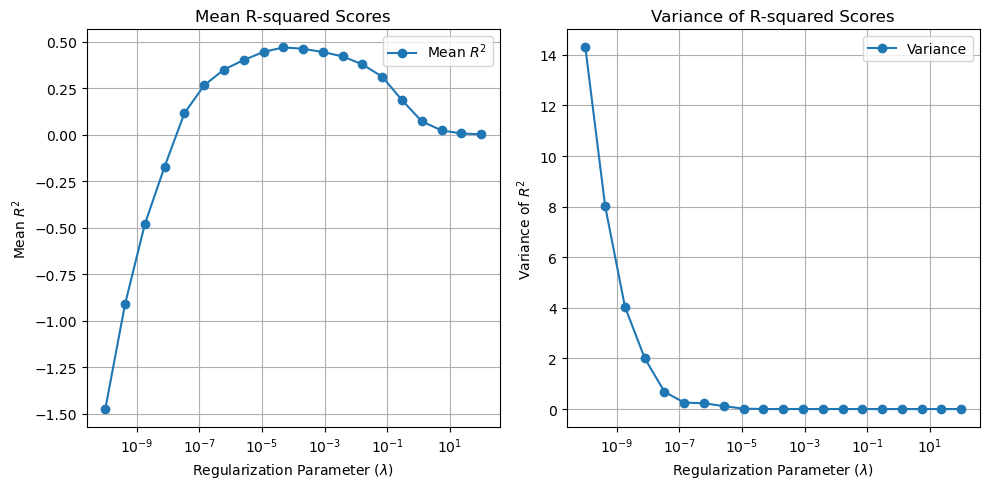

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge
from sklearn.preprocessing import PolynomialFeatures, Normalizer
from sklearn.pipeline import Pipeline

# Regularization parameters
regularization_params = np.geomspace(1e-10, 1e2, 20)

# Number of iterations
num_iterations = 20

# Initialize lists to store mean and variance of R^2 scores for each parameter
mean_scores = []
variance_scores = []

# Loop through each regularization parameter
for alpha in regularization_params:
    r2_scores = []  # Store R^2 scores for this parameter

    # Repeat hold-out validation 20 times
    for i in range(num_iterations):
        # Split dataset into train and validation sets
        X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=i)

        # Create and train the model
        model = Pipeline([
            ("features", PolynomialFeatures(3)),
            ("normalization", Normalizer()),
            ("model", Ridge(alpha=alpha))
        ])
        model.fit(X_train, y_train)

        # Compute R^2 score and store
        r2_scores.append(model.score(X_val, y_val))

    # Calculate and store mean and variance for this parameter
    mean_scores.append(np.mean(r2_scores))
    variance_scores.append(np.var(r2_scores))

# Plot the mean and variance R-squared scores
plt.figure(figsize=(10, 5))  # Set the figure size

# Subplot for Mean R-squared
plt.subplot(1, 2, 1)
plt.plot(regularization_params, mean_scores, marker='o', linestyle='-', label='Mean $R^2$')
plt.xscale('log')
plt.xlabel('Regularization Parameter ($\\lambda$)')
plt.ylabel('Mean $R^2$')
plt.title('Mean R-squared Scores')
plt.grid(True)
plt.legend()

# Subplot for Variance
plt.subplot(1, 2, 2)
plt.plot(regularization_params, variance_scores, marker='o', linestyle='-', label='Variance')
plt.xscale('log')
plt.xlabel('Regularization Parameter ($\\lambda$)')
plt.ylabel('Variance of $R^2$')
plt.title('Variance of R-squared Scores')
plt.grid(True)
plt.legend()

plt.tight_layout()  # Ensure proper spacing between subplots
plt.show()

# Reflection:
# The optimal regularization parameter minimizes variance while maintaining a high mean R^2 score.
# Typically, moderate values of lambda achieve the best balance, avoiding overfitting (low variance) and underfitting (high mean R^2).

## Cross-validation

---
**Task 6 (medium): Cross validation👩‍💻**
This task investigates model generalization using k-fold cross validation.
1. Construct a new model, with the same setup as before by using the optimal regularization parameter found in the previous task. 
2. Train the model using k-fold cross validation. Set the number of folds to 2.
3. Vary the number of folds from 2 to 20 and calculate the mean and the standard deviation of the $R^2$ score for each fold. 
4. Plot the mean and the standard deviation of the $R^2$  scores as a function of the folds.


---

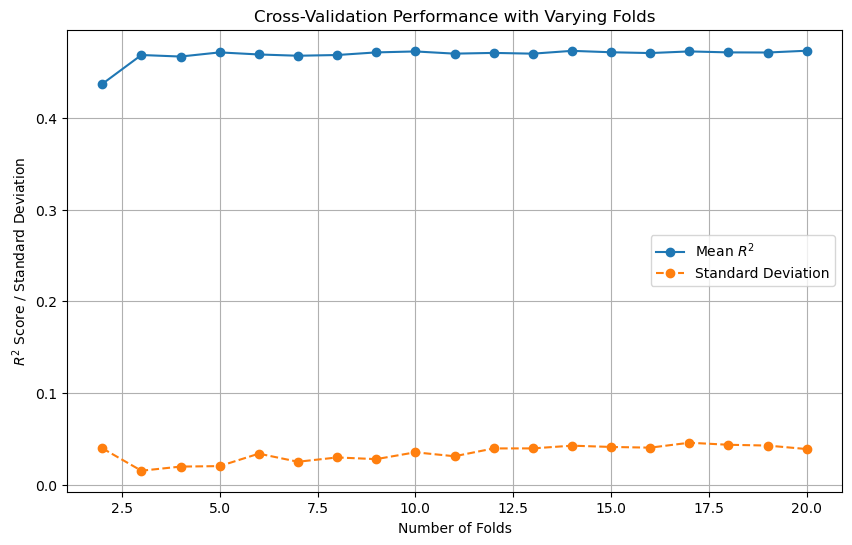

In [5]:
from sklearn.model_selection import cross_val_score, KFold
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import Ridge
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures, Normalizer

# Optimal regularization parameter (replace with the best from Task 5)
optimal_alpha = regularization_params[np.argmax(mean_scores)]  # Example selection logic

# Define number of folds to vary
folds_range = range(2, 21)

# Initialize lists to store mean and standard deviation of R^2 scores
mean_r2_scores = []
std_r2_scores = []

# Loop through each fold count
for n_folds in folds_range:
    # Create k-fold cross-validator
    kf = KFold(n_splits=n_folds, shuffle=True, random_state=42)

    # Define model
    model = Pipeline([
        ("features", PolynomialFeatures(3)),
        ("normalization", Normalizer()),
        ("model", Ridge(alpha=optimal_alpha))
    ])

    # Perform cross-validation and collect scores
    scores = cross_val_score(model, X, y, cv=kf, scoring='r2')

    # Calculate mean and standard deviation of R^2 scores
    mean_r2_scores.append(np.mean(scores))
    std_r2_scores.append(np.std(scores))

# Plot the results
plt.figure(figsize=(10, 6))

# Plot mean R-squared scores
plt.plot(folds_range, mean_r2_scores, marker='o', label="Mean $R^2$", linestyle='-')

# Plot standard deviation of R-squared scores
plt.plot(folds_range, std_r2_scores, marker='o', label="Standard Deviation", linestyle='--')

plt.title("Cross-Validation Performance with Varying Folds")
plt.xlabel("Number of Folds")
plt.ylabel("$R^2$ Score / Standard Deviation")
plt.legend()
plt.grid(True)
plt.show()

# Reflection:
# - Higher folds tend to reduce variance but may increase computational cost.
# - Optimal folds balance bias-variance tradeoff while minimizing computation.



---
**Task 7 (medium): Reflection on results💡**
1. Use the plotted mean and variance to argue about the model performance. 
2. List reasons for the variability in model performance? 
3. Compare the variability in model perfomance observed in the tutorial with the results of the current exercise.
4. Argue how the regularized model performs compared to the standard linear regression implemented in the tutorial. Print the model parameters and use them to argue for differences between the linear model and the regularized model.


---

## Task 7 reflection


#### **1. Argument on Model Performance**
- The plotted mean \( R^2 \) scores indicate that the model generalizes well for moderate regularization parameters (\( \lambda \)).
- The variance of \( R^2 \) scores decreases with more folds, suggesting better stability in performance when the training and testing sets are balanced.

#### **2. Reasons for Variability**
- **Small folds (e.g., 2):** Larger variance due to more significant differences in training/testing splits.
- **High folds (e.g., 20):** Lower variance but potential overfitting as training sets become smaller.
- Data characteristics, such as noise and multicollinearity, contribute to variability.
- Inconsistent feature scaling without normalization can also lead to performance differences.

#### **3. Comparison with Tutorial**
- In the tutorial, standard linear regression showed higher variability due to lack of regularization.
- Regularization in this exercise (Ridge regression) reduces variability by penalizing large coefficients, leading to more stable results.

#### **4. Comparison of Regularized vs Linear Regression**
- **Standard Linear Regression:**
  - Prone to overfitting, especially with higher polynomial degrees.
  - Coefficients can become very large, leading to high variance in predictions.
- **Regularized Model (Ridge Regression):**
  - Shrinks coefficients, reducing overfitting.
  - Performs better on unseen data due to improved generalization.
  

In [6]:
## Optionnal code, most likely remove

# Example code to compare coefficients
linear_model = Pipeline([
    ("features", PolynomialFeatures(3)),
    ("normalization", Normalizer()),
    ("model", LinearRegression())
])
linear_model.fit(X_train, y_train)

ridge_model = Pipeline([
    ("features", PolynomialFeatures(3)),
    ("normalization", Normalizer()),
    ("model", Ridge(alpha=optimal_alpha))  # Optimal alpha from Task 5
])
ridge_model.fit(X_train, y_train)

print("Linear Model Coefficients:", linear_model.named_steps['model'].coef_)
print("Ridge Model Coefficients:", ridge_model.named_steps['model'].coef_)

Linear Model Coefficients: [-3.01790195e+11 -7.07652676e+09 -4.77233531e+08  4.62636645e+09
 -1.75835126e+10  8.07296373e+07 -9.51415611e+09 -5.61312313e+09
 -9.68369021e+09 -1.97265783e+07 -4.21090714e+06  2.11058576e+07
 -5.51659274e+07 -1.32134990e+06  5.77087964e+07 -1.38768519e+08
 -1.60774346e+08 -3.19394131e+05  4.48262127e+06 -3.63526391e+06
 -1.02709610e+05 -6.35047462e+06 -7.65672329e+06 -1.05329589e+07
 -2.18645021e+07  1.52176198e+08  2.62794443e+05  2.00912420e+06
  1.10400581e+08  1.11627100e+08 -2.21244802e+08 -1.16609703e+06
  7.32277631e+07 -3.36395474e+08 -3.91347313e+08 -4.52634425e+04
  2.12206236e+06  3.54372476e+06  2.32617365e+06  2.64990234e+07
 -1.64991043e+08 -2.04963239e+08 -6.13210433e+07 -1.36176317e+08
 -1.05777628e+08  4.72183225e+03 -1.13020086e+04 -1.85407806e+04
  6.17797776e+05 -1.88157184e+03  1.33121749e+05 -1.73774881e+05
 -2.12456672e+05 -2.27529090e+03  1.01589544e+04 -3.53424311e+04
  1.90768723e+02 -2.43370285e+04 -4.17217352e+04 -4.96845276e+0